https://medium.com/analytics-vidhya/write-your-own-custom-data-generator-for-tensorflow-keras-1252b64e41c3

In [129]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import random as random
import matplotlib.animation as animation
import pandas as pd
from functions import *
from tensorflow.keras import Sequential
from sklearn.utils import class_weight
import keras.models
from PIL import Image

In [130]:
def label_mnist(digit_frame):
    
    label = np.zeros(np.shape(digit_frame), dtype="float32")
    
    for i in range(len(digit_frame)):
        for j in range(len(digit_frame[i])):
            if digit_frame[i][j] != 0:
                label[i][j] = 1
    
    return label

In [131]:
def generate_mnist_dataset(digits_set, digits_labels_set, n_frames):
    #version with 11 frames instead of one frame of vectors
    
    digit_size = len(digits_set[0][0])
    frame_shape = np.shape(digits_set[0])
    frames = []
    labels = []
    
    for i in range(n_frames):
        
        n = random.randint(0,len(digits_set)-1)

        digit = digits_labels_set[n]
        frame = digits_set[n]
        label = []
        for j in range(len(list(set(digits_labels_set)))):

            
            if j == digit:
                label.append(label_mnist(digits_set[n]))
 
            
            else:
                label.append(np.zeros(frame_shape, dtype="float32" ))
 
    
        #background
        background = 1-label[int(digits_labels_set[n])]

        
        label.append(background)
        
        labels.append(label)
        frames.append(frame)
        
    return np.array(frames), np.array(labels)

In [132]:
len_pretrain_set = 1000
len_pretest_set = 100
pre_size_frame = 48
pre_n_digits = 1
pre_n_epochs = 500

In [141]:
len_train_set = 1000
len_test_set = 100
size_frame = 280
n_digits = 5
n_epochs = 5
digit_max = 4

In [134]:
(digits_train, labels_train), (digits_test, labels_test) = keras.datasets.mnist.load_data()

In [135]:
mnist_shape = np.shape(digits_train[0])

In [136]:
data_mnist, labels_mnist = generate_mnist_dataset(digits_train, labels_train, 10)

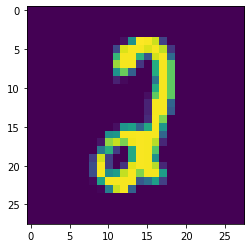

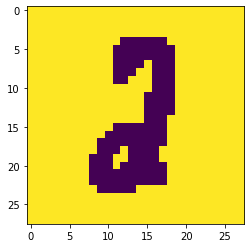

In [140]:
plt.figure()
plt.imshow(data_mnist[1])
plt.figure()
plt.imshow(labels_mnist[1][10])

In [142]:
digits_train = digits_train[labels_train < digit_max]
labels_train = labels_train[labels_train < digit_max]
digits_test = digits_test[labels_test < digit_max]
labels_test = labels_test[labels_test < digit_max]

In [143]:
def generate_dataset(frame_size, digits_set, digits_labels_set, n_digits, n_frames, digit_max):
    #version with digit_max frames instead of one frame of vectors
    
    digit_size = len(digits_set[0][0])
    
    frames = []
    labels = []
    
    for i in range(n_frames):
        
        frame = np.zeros((frame_size, frame_size), dtype="float32")
        label = [np.zeros((frame_size, frame_size), dtype="float32" ) for i in range(digit_max)]
        #a 280x280 matrix for each digit + the background added at the end

        indexes = random.sample(range(len(digits_set)), n_digits)
        digits = digits_set[indexes]
        digits_labels = digits_labels_set[indexes]
        
        positions = [random.sample(range(frame_size-digit_size-1),2) for i in range(n_digits)]
        background = np.ones((frame_size, frame_size), dtype="float32")
        
        for k, digit in enumerate(digits):
            digit_label = digits_labels[k]

            frame, digit_proba, background = insert_and_label(digit, digit_label, frame, label[digit_label], positions[k], background)
            label[digit_label] = digit_proba
            
        label += [background]

        #print(frame)
    
        
        labels.append(label)
        frames.append(frame)

        
    return np.array(frames), np.array(labels)

In [144]:
pretrain_data, pretrain_labels = generate_mnist_dataset(digits_train, labels_train, len_pretrain_set)
pretest_data, pretest_labels = generate_mnist_dataset(digits_test, labels_test, len_pretest_set)

print(np.shape(pretrain_data))
print(np.shape(pretrain_labels))

pretrain_data = pretrain_data[:, :, :, None]
pretrain_labels = pretrain_labels.transpose(0, 2, 3, 1)
pretest_data = pretest_data[:, :, :, None]
pretest_labels = pretest_labels.transpose(0, 2, 3, 1)

print(np.shape(pretrain_data))
print(np.shape(pretrain_labels))

(1000, 28, 28)
(1000, 5, 28, 28)
(1000, 28, 28, 1)
(1000, 28, 28, 5)


In [145]:
train_data, train_labels = generate_mnist_dataset(digits_train, labels_train, len_train_set)
test_data, test_labels = generate_mnist_dataset(digits_test, labels_test, len_test_set)


print(np.shape(train_data))
print(np.shape(train_labels))

train_data = train_data[:, :, :, None]
train_labels = train_labels.transpose(0, 2, 3, 1)
test_data = test_data[:, :, :, None]
test_labels = test_labels.transpose(0, 2, 3, 1)

print(np.shape(train_data))
print(np.shape(train_labels))

(1000, 28, 28)
(1000, 5, 28, 28)
(1000, 28, 28, 1)
(1000, 28, 28, 5)


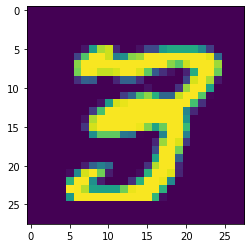

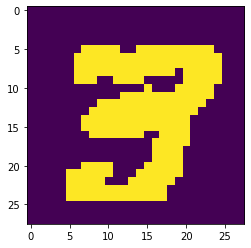

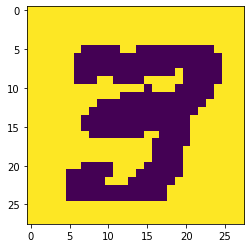

In [148]:
plt.figure()
plt.imshow(train_data[0][:,:,0])
#Image.fromarray(train_data[0][:,:,0], "L").save("data frame.png")

plt.figure()
plt.imshow(train_labels[0][:,:,3])
#Image.fromarray(train_labels[0][:,:,9], "L").save("data label.png")

plt.figure()
plt.imshow(train_labels[0][:,:,4])
#Image.fromarray(train_labels[0][:,:,10], "L").save("background.png")



In [149]:
#Image.fromarray?

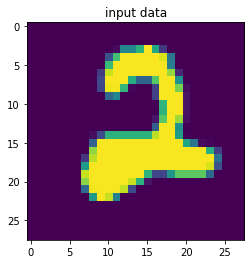

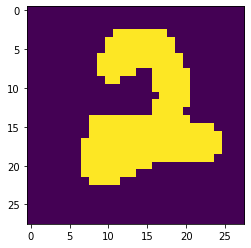

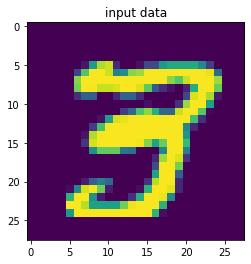

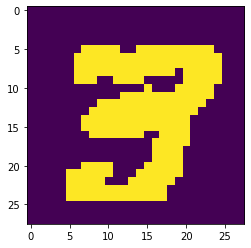

In [150]:
i_pre = 0
n_pre = 2

plt.figure()
plt.title("input data")
plt.imshow(pretrain_data[i_pre])

plt.figure()
plt.imshow(pretrain_labels[i_pre][:,:,n_pre])
#my_imshow(train_labels[i], n)

i = 0
n = 3

plt.figure()
plt.title("input data")
plt.imshow(train_data[i])

plt.figure()
plt.imshow(train_labels[i][:,:,n])
#my_imshow(train_labels[i], n)

# Model based on the code on the website https://pyimagesearch.com/2022/02/21/u-net-image-segmentation-in-keras/

# Building the model

In [151]:
def conv_block(x, n_filters):
    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, 
                      padding = "same", 
                      activation = "relu", 
                      kernel_initializer = "he_normal")(x)
    return x

In [152]:
def double_conv_block(x, n_filters):
    # Conv2D 
    x = layers.Conv2D(n_filters, 3, 
                      padding = "same", 
                      activation = "relu", 
                      kernel_initializer = "he_normal")(x)
    # Conv2D 
    x = layers.Conv2D(n_filters, 3, 
                      padding = "same", 
                      activation = "relu", 
                      kernel_initializer = "he_normal")(x)
    return x

In [153]:
def downsample_block(x, n_filters):
    f = conv_block(x, n_filters)
    p = layers.MaxPool2D(2)(f)
    p = layers.Dropout(0.3)(p)
    return f, p

In [154]:
def upsample_block(x, conv_features, n_filters):
    # upsample
    x = layers.Conv2DTranspose(n_filters, 2, 2, padding="same")(x)
    # concatenate
    x = layers.concatenate([x, conv_features])
    # dropout
    x = layers.Dropout(0.3)(x)
    # Conv2D 
    x = conv_block(x, n_filters)
    return x

In [155]:
def build_pre_unet_model():

    # inputs
    inputs = layers.Input(shape=(4, 4,1))
    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 10)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 32)
    
    
    # 3 - bottleneck
    bottleneck = double_conv_block(p2, 64)

    # decoder: expanding path - upsample
    # 5 - upsample
    u5 = upsample_block(bottleneck, f2, 32)
    # 6 - upsample
    u6 = upsample_block(u5, f1, 10)


    # outputs
    outputs = layers.Conv2D(digit_max+1, 1, 
                            padding="same", 
                            activation = "softmax")(u6)

    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")

    return unet_model

In [156]:
def build_unet_model():

    # inputs
    inputs = layers.Input(shape=(size_frame,size_frame,1))
    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 10)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 32)
    
    
    # 3 - bottleneck
    bottleneck = double_conv_block(p2, 64)

    # decoder: expanding path - upsample
    # 5 - upsample
    u5 = upsample_block(bottleneck, f2, 32)
    # 6 - upsample
    u6 = upsample_block(u5, f1, 10)


    # outputs
    outputs = layers.Conv2D(digit_max+1, 1, 
                            padding="same", 
                            activation = "softmax")(u6)

    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")

    return unet_model

In [170]:
#define a max pooling layer
max_pool = layers.MaxPooling2D(pool_size = 7, strides = 7)
 
#define a sequential model with just one pooling layer
model_max = Sequential([max_pool]) 

def downsample_data(dataset, labels_set):
    
    data_output, labels_output = [], []
    
    for i, data in enumerate(dataset):
        #shape data = 28x28x1
        label = labels_set[i]

        label_output = []
        for k, frame in enumerate([label[:,:,j] for j in range(len(label[0][0])-1)]):
            #only the digits frames
            frame = np.reshape(frame,(1, 28,28, 1))
            pred_frame = np.reshape(model_max.predict(frame), (4,4))
            label_output.append(pred_frame)

        background = np.reshape(label[:,:,-1],(1, 28,28, 1))
        pred_background = np.reshape(-model_max.predict(-background), (4,4)) 
        label_output.append(pred_background)

        data = np.reshape(data, (1, 28,28, 1))
        pred_data = np.reshape(model_max.predict(data), (4,4))
        data_output.append(pred_data)

        labels_output.append(label_output)
        
    return np.array(data_output), np.array(labels_output)

#output = np.squeeze(output) 


In [174]:
#long to execute
train_down_data, train_down_labels = downsample_data(pretrain_data, pretrain_labels)
test_down_data, test_down_labels = downsample_data(pretest_data, pretest_labels)

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


In [175]:
print(np.shape(train_down_data))
print(np.shape(train_down_labels))

train_down_data = train_down_data[:, :, :, None]
train_down_labels = train_down_labels.transpose(0, 2, 3, 1)
test_down_data = test_down_data[:, :, :, None]
test_down_labels = test_down_labels.transpose(0, 2, 3, 1)

print(np.shape(train_down_data))
print(np.shape(train_down_labels))

(1000, 4, 4)
(1000, 5, 4, 4)
(1000, 4, 4, 1)
(1000, 4, 4, 5)


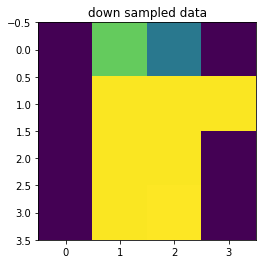

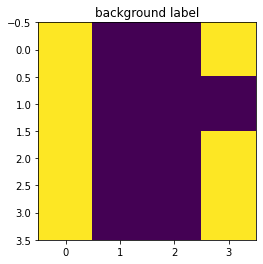

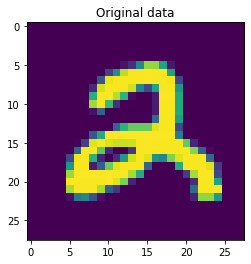

In [176]:
k = 5
n = 10

plt.figure()
plt.title("down sampled data")
data = np.reshape(down_data[k], (4,4))
plt.imshow(data)

plt.figure()
plt.title("background label")
label = np.reshape(down_labels[k][n], (4,4))
plt.imshow(label)

plt.figure()
plt.title("Original data")
plt.imshow(pretrain_data[k])

In [177]:
@tf.function
def new_weighted_loss(y_true, y_pred):
    
    background = y_true[:, :,-1]
    w1 = tf.reduce_sum(background)/tf.cast(tf.size(background), tf.float32)
    #proportion of ones
    
    w2 = 1-w1
    #proportion of zeros
    
    w = background*w2 + (1-background)*w1
    #weights matrix

    #loss = tf.reduce_sum(w[:, :, None]*tf.square(tf.subtract(y_true, y_pred))) 
    #to broadcast (over channels)
    #tf.print(tf.math.log(y_pred))

    y_pred = tf.clip_by_value(y_pred, 0.0001, 0.9999)
    binary_term = w[:,:,None]* ((y_true)* tf.math.log(y_pred) + (1-y_true)*tf.math.log(1-y_pred))
    loss = - tf.reduce_mean(binary_term)
    #tf.print(loss)
    
    #term = w[:,:,None]*(y_true)* tf.math.log(y_pred)
    #loss = - tf.reduce_sum(term)
    #tf.print(loss)

    return loss

In [178]:
pre_unet_model = build_pre_unet_model()

In [179]:
pre_unet_model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 4, 4, 1)]    0           []                               
                                                                                                  
 conv2d_14 (Conv2D)             (None, 4, 4, 10)     100         ['input_3[0][0]']                
                                                                                                  
 max_pooling2d_34 (MaxPooling2D  (None, 2, 2, 10)    0           ['conv2d_14[0][0]']              
 )                                                                                                
                                                                                                  
 dropout_8 (Dropout)            (None, 2, 2, 10)     0           ['max_pooling2d_34[0][0]']   

class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(train_labels_flattened),
                                                 y = train_labels_flattened)

In [180]:
keras.losses.custom_loss = new_weighted_loss

# to test it with arrays, this helps the function after to interpret it as a tensor
@tf.function
def custom_loss(true, pred):
    #true and pred are tensors or np arrays
    resid = tf.sqrt(tf.reduce_sum(true * tf.square(true - pred)))
    return resid

a = np.array([[[0.,0.,1.],[1.,0.,0.]],[[0.,1.,0.],[1.,1.,0.]]])
b = np.array([[[0.1,0.1,0.9],[0.9,0.2,0.1]],[[0.2,0.9,0.1],[0.8,0.8,0.2]]])
tf_a = tf.convert_to_tensor(a)
tf_b = tf.convert_to_tensor(b)
weighted_mse(tf_b, tf_a, 1)

In [181]:
pre_unet_model.save("pre_train_unet")
pre_unet_model = keras.models.load_model("pre_train_unet", custom_objects={"custom_loss": new_weighted_loss})

INFO:tensorflow:Assets written to: pre_train_unet/assets


INFO:tensorflow:Assets written to: pre_train_unet/assets


In [182]:
pre_unet_model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=new_weighted_loss,
                  metrics="accuracy")

In [183]:
#train_length = info.splits["train"].num_examples
#steps_per_epoch = train_length // batch_size
#val_subsplits = 5
#test_length = info.splits["test"].num_examples
#validation_steps = test_length // batch_size // val_subsplits
model_history = pre_unet_model.fit(train_down_data, train_down_labels #.astype(np.float32)
                                 ,
                                epochs=pre_n_epochs,
                                #steps_per_epoch=steps_per_epoch,
                                #validation_steps=validation_steps,
                                validation_data=[test_down_data, test_down_labels #.astype(np.float32)
                                ])

Epoch 1/500
32/32 [==============================] - 1s 18ms/step - loss: 1.1957 - accuracy: 0.1691 - val_loss: 1.0229 - val_accuracy: 0.2463
Epoch 2/500
32/32 [==============================] - 0s 13ms/step - loss: 1.0132 - accuracy: 0.2573 - val_loss: 0.8469 - val_accuracy: 0.3350
Epoch 3/500
32/32 [==============================] - 0s 13ms/step - loss: 0.8513 - accuracy: 0.3546 - val_loss: 0.6900 - val_accuracy: 0.4563
Epoch 4/500
32/32 [==============================] - 0s 12ms/step - loss: 0.7280 - accuracy: 0.4344 - val_loss: 0.6669 - val_accuracy: 0.4650
Epoch 5/500
32/32 [==============================] - 0s 10ms/step - loss: 0.6718 - accuracy: 0.4607 - val_loss: 0.6220 - val_accuracy: 0.4900
Epoch 6/500
32/32 [==============================] - 0s 10ms/step - loss: 0.6006 - accuracy: 0.4966 - val_loss: 0.5536 - val_accuracy: 0.5119
Epoch 7/500
32/32 [==============================] - 0s 11ms/step - loss: 0.5638 - accuracy: 0.5111 - val_loss: 0.4837 - val_accuracy: 0.5525
Epoch 

32/32 [==============================] - 0s 9ms/step - loss: 0.1448 - accuracy: 0.5008 - val_loss: 0.1312 - val_accuracy: 0.5250
Epoch 59/500
32/32 [==============================] - 0s 10ms/step - loss: 0.1444 - accuracy: 0.5082 - val_loss: 0.1319 - val_accuracy: 0.5288
Epoch 60/500
32/32 [==============================] - 0s 9ms/step - loss: 0.1461 - accuracy: 0.5127 - val_loss: 0.1319 - val_accuracy: 0.5269
Epoch 61/500
32/32 [==============================] - 0s 9ms/step - loss: 0.1441 - accuracy: 0.5084 - val_loss: 0.1316 - val_accuracy: 0.5275
Epoch 62/500
32/32 [==============================] - 0s 11ms/step - loss: 0.1427 - accuracy: 0.5132 - val_loss: 0.1305 - val_accuracy: 0.5281
Epoch 63/500
32/32 [==============================] - 0s 11ms/step - loss: 0.1425 - accuracy: 0.5133 - val_loss: 0.1312 - val_accuracy: 0.5281
Epoch 64/500
32/32 [==============================] - 0s 11ms/step - loss: 0.1426 - accuracy: 0.5129 - val_loss: 0.1317 - val_accuracy: 0.5300
Epoch 65/500
32

32/32 [==============================] - 0s 11ms/step - loss: 0.1182 - accuracy: 0.6179 - val_loss: 0.1025 - val_accuracy: 0.6338
Epoch 116/500
32/32 [==============================] - 0s 13ms/step - loss: 0.1181 - accuracy: 0.6299 - val_loss: 0.1042 - val_accuracy: 0.6550
Epoch 117/500
32/32 [==============================] - 0s 10ms/step - loss: 0.1163 - accuracy: 0.6343 - val_loss: 0.0983 - val_accuracy: 0.6475
Epoch 118/500
32/32 [==============================] - 0s 10ms/step - loss: 0.1157 - accuracy: 0.6366 - val_loss: 0.0979 - val_accuracy: 0.6500
Epoch 119/500
32/32 [==============================] - 0s 10ms/step - loss: 0.1156 - accuracy: 0.6266 - val_loss: 0.0979 - val_accuracy: 0.6481
Epoch 120/500
32/32 [==============================] - 0s 10ms/step - loss: 0.1148 - accuracy: 0.6362 - val_loss: 0.0981 - val_accuracy: 0.6431
Epoch 121/500
32/32 [==============================] - 0s 10ms/step - loss: 0.1151 - accuracy: 0.6336 - val_loss: 0.0997 - val_accuracy: 0.6812
Epoch 

32/32 [==============================] - 0s 10ms/step - loss: 0.0875 - accuracy: 0.6924 - val_loss: 0.0755 - val_accuracy: 0.7156
Epoch 173/500
32/32 [==============================] - 0s 10ms/step - loss: 0.0891 - accuracy: 0.6935 - val_loss: 0.0769 - val_accuracy: 0.7119
Epoch 174/500
32/32 [==============================] - 0s 11ms/step - loss: 0.0886 - accuracy: 0.6897 - val_loss: 0.0773 - val_accuracy: 0.7106
Epoch 175/500
32/32 [==============================] - 0s 11ms/step - loss: 0.0880 - accuracy: 0.6957 - val_loss: 0.0757 - val_accuracy: 0.7200
Epoch 176/500
32/32 [==============================] - 0s 11ms/step - loss: 0.0858 - accuracy: 0.7053 - val_loss: 0.0721 - val_accuracy: 0.7394
Epoch 177/500
32/32 [==============================] - 0s 12ms/step - loss: 0.0874 - accuracy: 0.7024 - val_loss: 0.0737 - val_accuracy: 0.7312
Epoch 178/500
32/32 [==============================] - 0s 12ms/step - loss: 0.0898 - accuracy: 0.6857 - val_loss: 0.0887 - val_accuracy: 0.6425
Epoch 

Epoch 229/500
32/32 [==============================] - 0s 11ms/step - loss: 0.0768 - accuracy: 0.7355 - val_loss: 0.0633 - val_accuracy: 0.7875
Epoch 230/500
32/32 [==============================] - 0s 10ms/step - loss: 0.0792 - accuracy: 0.7343 - val_loss: 0.0601 - val_accuracy: 0.7975
Epoch 231/500
32/32 [==============================] - 0s 11ms/step - loss: 0.0785 - accuracy: 0.7448 - val_loss: 0.0638 - val_accuracy: 0.7925
Epoch 232/500
32/32 [==============================] - 0s 11ms/step - loss: 0.0785 - accuracy: 0.7417 - val_loss: 0.0617 - val_accuracy: 0.7812
Epoch 233/500
32/32 [==============================] - 0s 9ms/step - loss: 0.0751 - accuracy: 0.7423 - val_loss: 0.0586 - val_accuracy: 0.7962
Epoch 234/500
32/32 [==============================] - 0s 10ms/step - loss: 0.0764 - accuracy: 0.7499 - val_loss: 0.0576 - val_accuracy: 0.8031
Epoch 235/500
32/32 [==============================] - 0s 9ms/step - loss: 0.0792 - accuracy: 0.7439 - val_loss: 0.0591 - val_accuracy: 0

Epoch 286/500
32/32 [==============================] - 0s 11ms/step - loss: 0.0689 - accuracy: 0.7906 - val_loss: 0.0521 - val_accuracy: 0.8756
Epoch 287/500
32/32 [==============================] - 0s 12ms/step - loss: 0.0704 - accuracy: 0.7853 - val_loss: 0.0490 - val_accuracy: 0.8819
Epoch 288/500
32/32 [==============================] - 0s 11ms/step - loss: 0.0720 - accuracy: 0.7851 - val_loss: 0.0457 - val_accuracy: 0.8800
Epoch 289/500
32/32 [==============================] - 0s 11ms/step - loss: 0.0689 - accuracy: 0.7847 - val_loss: 0.0501 - val_accuracy: 0.8594
Epoch 290/500
32/32 [==============================] - 0s 11ms/step - loss: 0.0707 - accuracy: 0.7895 - val_loss: 0.0506 - val_accuracy: 0.8719
Epoch 291/500
32/32 [==============================] - 0s 10ms/step - loss: 0.0694 - accuracy: 0.7956 - val_loss: 0.0483 - val_accuracy: 0.8806
Epoch 292/500
32/32 [==============================] - 0s 11ms/step - loss: 0.0694 - accuracy: 0.7901 - val_loss: 0.0499 - val_accuracy:

Epoch 343/500
32/32 [==============================] - 0s 13ms/step - loss: 0.0659 - accuracy: 0.8067 - val_loss: 0.0463 - val_accuracy: 0.8700
Epoch 344/500
32/32 [==============================] - 0s 13ms/step - loss: 0.0669 - accuracy: 0.8067 - val_loss: 0.0460 - val_accuracy: 0.8838
Epoch 345/500
32/32 [==============================] - 0s 13ms/step - loss: 0.0649 - accuracy: 0.8076 - val_loss: 0.0459 - val_accuracy: 0.8794
Epoch 346/500
32/32 [==============================] - 0s 13ms/step - loss: 0.0637 - accuracy: 0.8227 - val_loss: 0.0432 - val_accuracy: 0.8956
Epoch 347/500
32/32 [==============================] - 0s 13ms/step - loss: 0.0652 - accuracy: 0.8060 - val_loss: 0.0470 - val_accuracy: 0.8662
Epoch 348/500
32/32 [==============================] - 0s 12ms/step - loss: 0.0651 - accuracy: 0.8079 - val_loss: 0.0430 - val_accuracy: 0.8969
Epoch 349/500
32/32 [==============================] - 0s 13ms/step - loss: 0.0671 - accuracy: 0.8044 - val_loss: 0.0459 - val_accuracy:

Epoch 400/500
32/32 [==============================] - 0s 10ms/step - loss: 0.0613 - accuracy: 0.8211 - val_loss: 0.0430 - val_accuracy: 0.8850
Epoch 401/500
32/32 [==============================] - 0s 10ms/step - loss: 0.0623 - accuracy: 0.8192 - val_loss: 0.0439 - val_accuracy: 0.8906
Epoch 402/500
32/32 [==============================] - 0s 10ms/step - loss: 0.0631 - accuracy: 0.8169 - val_loss: 0.0443 - val_accuracy: 0.8888
Epoch 403/500
32/32 [==============================] - 0s 11ms/step - loss: 0.0606 - accuracy: 0.8214 - val_loss: 0.0443 - val_accuracy: 0.8737
Epoch 404/500
32/32 [==============================] - 0s 11ms/step - loss: 0.0623 - accuracy: 0.8134 - val_loss: 0.0402 - val_accuracy: 0.9006
Epoch 405/500
32/32 [==============================] - 0s 10ms/step - loss: 0.0601 - accuracy: 0.8268 - val_loss: 0.0390 - val_accuracy: 0.9087
Epoch 406/500
32/32 [==============================] - 0s 10ms/step - loss: 0.0592 - accuracy: 0.8251 - val_loss: 0.0392 - val_accuracy:

Epoch 457/500
32/32 [==============================] - 0s 10ms/step - loss: 0.0596 - accuracy: 0.8231 - val_loss: 0.0384 - val_accuracy: 0.9038
Epoch 458/500
32/32 [==============================] - 0s 10ms/step - loss: 0.0582 - accuracy: 0.8322 - val_loss: 0.0392 - val_accuracy: 0.9075
Epoch 459/500
32/32 [==============================] - 0s 11ms/step - loss: 0.0602 - accuracy: 0.8278 - val_loss: 0.0373 - val_accuracy: 0.9019
Epoch 460/500
32/32 [==============================] - 0s 10ms/step - loss: 0.0599 - accuracy: 0.8248 - val_loss: 0.0427 - val_accuracy: 0.8900
Epoch 461/500
32/32 [==============================] - 0s 9ms/step - loss: 0.0586 - accuracy: 0.8281 - val_loss: 0.0415 - val_accuracy: 0.9006
Epoch 462/500
32/32 [==============================] - 0s 9ms/step - loss: 0.0584 - accuracy: 0.8247 - val_loss: 0.0411 - val_accuracy: 0.8975
Epoch 463/500
32/32 [==============================] - 0s 10ms/step - loss: 0.0616 - accuracy: 0.8263 - val_loss: 0.0413 - val_accuracy: 0

In [185]:
pre_predictions = pre_unet_model.predict(test_down_data)

4/4 [==============================] - 0s 5ms/step


In [186]:
accuracy = pre_unet_model.evaluate(test_down_data, test_down_labels)

4/4 [==============================] - 0s 5ms/step - loss: 0.0399 - accuracy: 0.9075


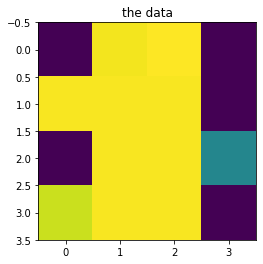

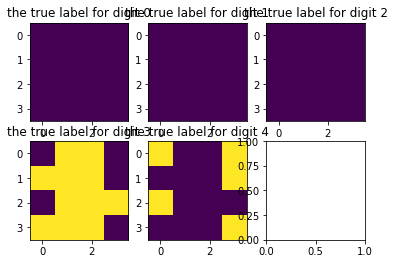

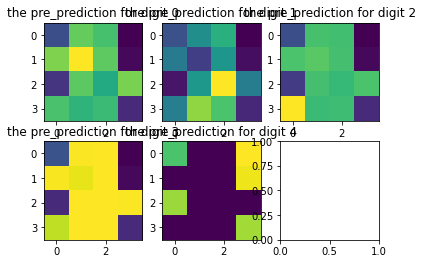

In [193]:
#frame
k = 5

plt.figure()
plt.title("the data")
plt.imshow(test_down_data[k])
plt.show()

#true_label = np.array([[test_labels[k][i][j][the_digit] for i in range(len(test_labels[k]))] for j in range(len(test_labels[k][0]))])
#plt.figure()
#plt.title("the label for digit"+str(the_digit))
#plt.imshow(255*true_label)

fig1, axs1 = plt.subplots(2, 3)

for digit in range(digit_max+1):
    
    axs1[digit//3,digit%3].set_title("the true label for digit "+str(digit))
    axs1[digit//3,digit%3].imshow(test_down_labels[k][:,:,digit])

    
fig2, axs2 = plt.subplots(2, 3)

for digit in range(digit_max+1):
    
    pre_prediction = pre_predictions[k][:,:,digit]
    axs2[digit//3,digit%3].set_title("the pre_prediction for digit "+str(digit))
    axs2[digit//3,digit%3].imshow(pre_prediction)
    


#print(new_weighted_loss(test_down_labels[k], pre_predictions[k]))
#print(type(true_label[0][0]))
#print(np.max(test_data[0]))

#print(np.where(predictions[0]==1))

#print(" the weighted mse = ", weighted_mse(prediction, true_label))

In [114]:
y_true = pretest_labels[k]
y_pred = pre_predictions[k]
somme = 0
for i in range(len(y_true)):
    for j in range(len(y_true[i])):
        for layer in range(len(y_true[i][j])):
            somme += (y_pred[i][j][layer] - y_true[i][j][layer])**2

loss = np.mean(somme)
print(loss)

667.2990033255251


In [180]:
pre_unet_model.save('pre_trained_unet')
unet_model = build_unet_model()
unet_model.load_weights("pre_trained_unet")

INFO:tensorflow:Assets written to: pre_trained_unet/assets


INFO:tensorflow:Assets written to: pre_trained_unet/assets
2022-07-29 16:31:59.609048: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open pre_trained_unet: FAILED_PRECONDITION: pre_trained_unet; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


In [181]:
unet_model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=new_weighted_loss,
                  metrics="accuracy")

In [183]:
model_history = unet_model.fit(train_data, train_labels #.astype(np.float32)
                                 ,
                                epochs=n_epochs,
                                #steps_per_epoch=steps_per_epoch,
                                #validation_steps=validation_steps,
                                validation_data=[test_data, test_labels #.astype(np.float32)
                                ])

Epoch 1/5
32/32 [==============================] - 103s 3s/step - loss: 32925.2812 - accuracy: 0.9944 - val_loss: 31941.2793 - val_accuracy: 0.9944
Epoch 2/5
32/32 [==============================] - 95s 3s/step - loss: 32928.0430 - accuracy: 0.9944 - val_loss: 31941.2793 - val_accuracy: 0.9944
Epoch 3/5
32/32 [==============================] - 95s 3s/step - loss: 32923.9453 - accuracy: 0.9944 - val_loss: 31941.2793 - val_accuracy: 0.9944
Epoch 4/5
32/32 [==============================] - 98s 3s/step - loss: 32936.6602 - accuracy: 0.9944 - val_loss: 31941.2793 - val_accuracy: 0.9944
Epoch 5/5
32/32 [==============================] - 95s 3s/step - loss: 32914.8828 - accuracy: 0.9944 - val_loss: 31941.2793 - val_accuracy: 0.9944


In [184]:
predictions = unet_model.predict(test_data)

4/4 [==============================] - 3s 552ms/step


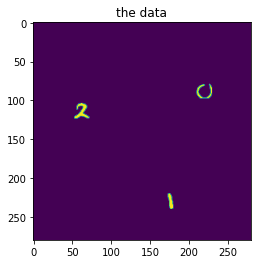

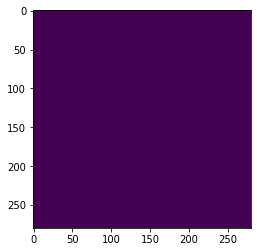

In [193]:
#frame
k = 2

plt.figure()
plt.title("the data")
plt.imshow(test_data[k])

#true_label = np.array([[test_labels[k][i][j][the_digit] for i in range(len(test_labels[k]))] for j in range(len(test_labels[k][0]))])
#plt.figure()
#plt.title("the label for digit"+str(the_digit))
#plt.imshow(255*true_label)
prediction = predictions[k]

plt.figure()
plt.imshow(prediction[:,:,3])

